<a href="https://colab.research.google.com/github/lokeshvenkatesan/Code/blob/master/Covid_19_week__1__forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Importing Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## Importing data from the local disk
train=pd.read_csv('train (1).csv')
test=pd.read_csv('test (1).csv')

In [0]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


test.head(

In [0]:
test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [0]:
train.shape

(17040, 8)

In [0]:
test.shape

(12212, 6)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Data columns (total 8 columns):
Id                17040 non-null int64
Province/State    7800 non-null object
Country/Region    17040 non-null object
Lat               17040 non-null float64
Long              17040 non-null float64
Date              17040 non-null object
ConfirmedCases    17040 non-null float64
Fatalities        17040 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.0+ MB


In [0]:
from  datetime import datetime

In [0]:
## Since we are forcasting globally we can drop Province/State. More over no. of entries is not even 50 % of the total entry
train.drop(['Province/State'],axis=1,inplace=True)
test.drop(['Province/State'],axis=1,inplace=True)

In [0]:
train_confm_case=train.groupby('Date')['ConfirmedCases'].sum()
train_confm_case.head()

Date
2020-01-22     554.0
2020-01-23     652.0
2020-01-24     939.0
2020-01-25    1432.0
2020-01-26    2113.0
Name: ConfirmedCases, dtype: float64

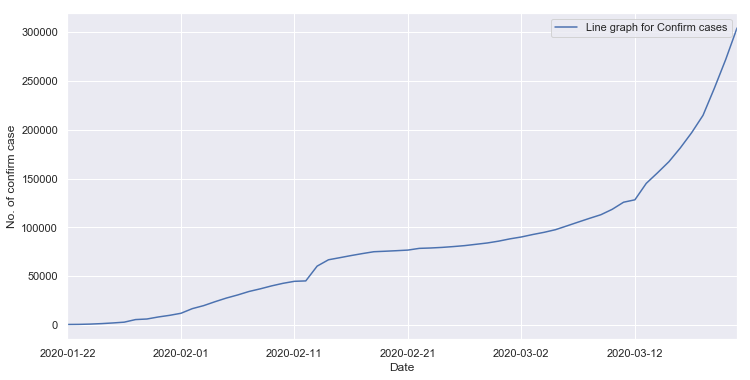

In [0]:
plt.figure(figsize=(12,6))
train_confm_case.plot()
plt.ylabel('No. of confirm case')
plt.legend(['Line graph for Confirm cases'])

OBSERVATION:
<br> From the above graph we found that COVID-19 confirmed cases started recorded from Jan 22nd<br>
It keeps increase sharply since total confirm cases has contributed from other part of the world 

In [0]:
train_confm_country=train.groupby(['Country/Region'])['ConfirmedCases'].sum().reset_index().sort_values('ConfirmedCases',ascending=False)
print(train_confm_country.head(10))

    Country/Region  ConfirmedCases
29           China       3368333.0
75           Italy        379683.0
71            Iran        209494.0
82    Korea, South        163905.0
139          Spain        128664.0
55         Germany        111228.0
154             US         90121.0
50          France         86281.0
144    Switzerland         31923.0
36     Cruise Ship         24804.0


<BarContainer object of 10 artists>

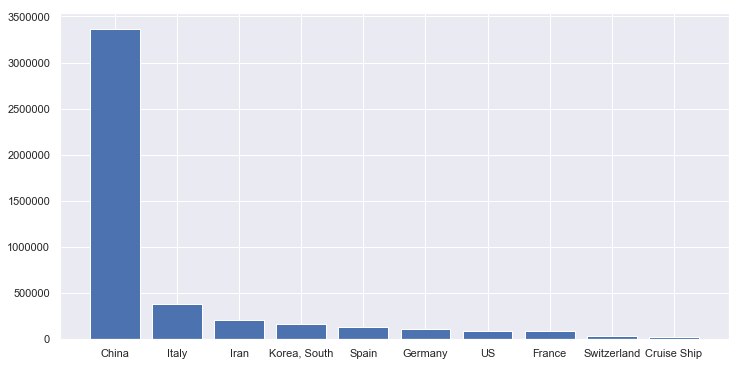

In [0]:
plt.figure(figsize=(12,6))
plt.bar(train_confm_country['Country/Region'][:10],train_confm_country['ConfirmedCases'][:10])

Observation: 
<br> 1) We found from the above graph that, China is having more confirm cases ,followed by Italy and Iran

In [0]:
train_confrm_india=train[train['Country/Region']=='India']
train_confrm_india.head()

,Id,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
7620,11812,India,21.0,78.0,2020-01-22,0.0,0.0
7621,11813,India,21.0,78.0,2020-01-23,0.0,0.0
7622,11814,India,21.0,78.0,2020-01-24,0.0,0.0
7623,11815,India,21.0,78.0,2020-01-25,0.0,0.0
7624,11816,India,21.0,78.0,2020-01-26,0.0,0.0


In [0]:
train_confrm_india_case=train_confrm_india.groupby('Date')['ConfirmedCases'].sum()
train_confrm_india_case.head()

Date
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
Name: ConfirmedCases, dtype: float64

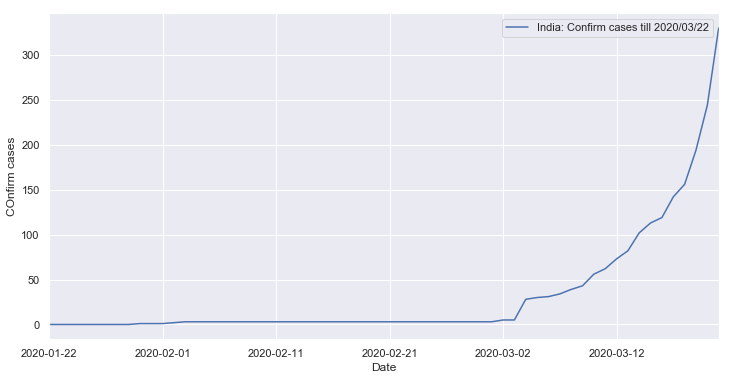

In [0]:
plt.figure(figsize=(12,6))
train_confrm_india_case.plot()
plt.ylabel('COnfirm cases')
plt.legend(['India: Confirm cases till 2020/03/22'])

Observation:<br>
From the above graph we fond that India confirm COVID_19 cases from Feb 2nd, and continue with the same no. till March 1st
<br> From 4th March ,no. of confirmed cases increases exponialtialy. Its shows that India is also closing toward Phase -3 

In [0]:
train_confm_china=train[train['Country/Region']=='China']
train_confm_china.head()

,Id,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
2820,4372,China,31.8257,117.2264,2020-01-22,1.0,0.0
2821,4373,China,31.8257,117.2264,2020-01-23,9.0,0.0
2822,4374,China,31.8257,117.2264,2020-01-24,15.0,0.0
2823,4375,China,31.8257,117.2264,2020-01-25,39.0,0.0
2824,4376,China,31.8257,117.2264,2020-01-26,60.0,0.0


In [0]:
train_confm_china_sort=train_confm_china.groupby('Date')['ConfirmedCases'].sum()
train_confm_china_sort.head()

Date
2020-01-22     548.0
2020-01-23     643.0
2020-01-24     920.0
2020-01-25    1406.0
2020-01-26    2075.0
Name: ConfirmedCases, dtype: float64

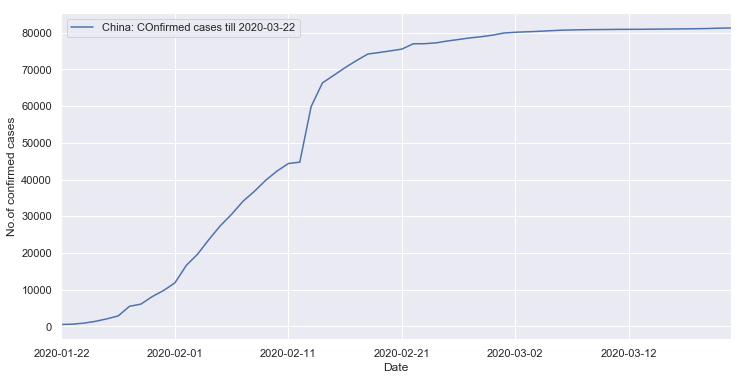

In [0]:
plt.figure(figsize=(12,6))
train_confm_china_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend(['China: COnfirmed cases till 2020-03-22'])

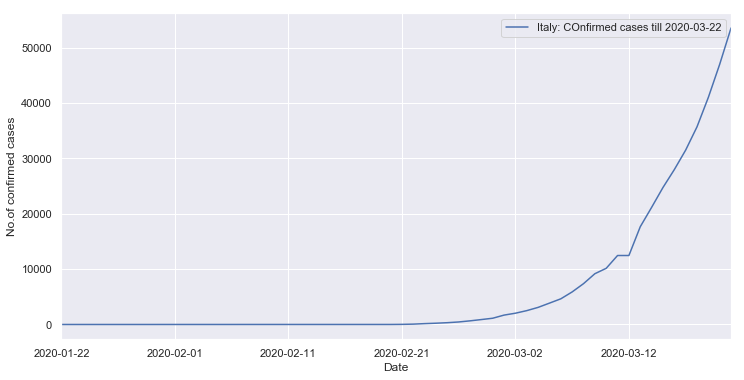

In [0]:
train_confm_italy=train[train['Country/Region']=='Italy']
train_confm_italy_sort=train_confm_italy.groupby('Date')['ConfirmedCases'].sum()
plt.figure(figsize=(12,6))
train_confm_italy_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend(['Italy: COnfirmed cases till 2020-03-22'])

In [0]:
train_daily_report=train.groupby('Date').sum()
train_daily_report.head()

,Id,Lat,Long,ConfirmedCases,Fatalities
Date,,,,,
2020-01-22,3737582,7465.7049,1353.5983,554.0,17.0
2020-01-23,3737866,7465.7049,1353.5983,652.0,18.0
2020-01-24,3738150,7465.7049,1353.5983,939.0,26.0
2020-01-25,3738434,7465.7049,1353.5983,1432.0,42.0
2020-01-26,3738718,7465.7049,1353.5983,2113.0,56.0


In [0]:
train_daily_report['Fatality rate']=train_daily_report['Fatalities']/train_daily_report['ConfirmedCases']
train_daily_report.head()

,Id,Lat,Long,ConfirmedCases,Fatalities,Fatality rate
Date,,,,,,
2020-01-22,3737582,7465.7049,1353.5983,554.0,17.0,0.030686
2020-01-23,3737866,7465.7049,1353.5983,652.0,18.0,0.027607
2020-01-24,3738150,7465.7049,1353.5983,939.0,26.0,0.027689
2020-01-25,3738434,7465.7049,1353.5983,1432.0,42.0,0.029330
2020-01-26,3738718,7465.7049,1353.5983,2113.0,56.0,0.026503


<Figure size 1296x720 with 0 Axes>

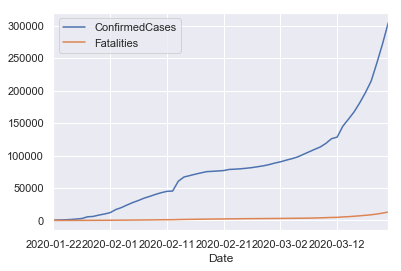

In [0]:
plt.figure(figsize=(18,10))
train_daily_report[['ConfirmedCases','Fatalities']].plot()

<Figure size 864x432 with 0 Axes>

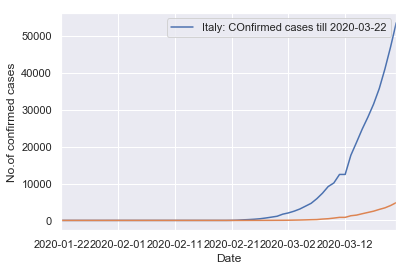

In [0]:
train_daily_report_italy=train[train['Country/Region']=='Italy']
train_daily_report_italy_sort=train_daily_report_italy.groupby('Date')['ConfirmedCases','Fatalities'].sum()
plt.figure(figsize=(12,6))
train_daily_report_italy_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend(['Italy: COnfirmed cases till 2020-03-22'])

<Figure size 1296x576 with 0 Axes>

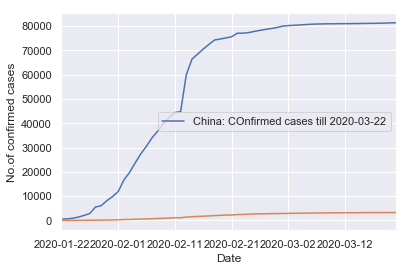

In [0]:
train_daily_report_china=train[train['Country/Region']=='China']
train_daily_report_china_sort=train_daily_report_china.groupby('Date')['ConfirmedCases','Fatalities'].sum()
plt.figure(figsize=(18,8))
train_daily_report_china_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend(['China: COnfirmed cases till 2020-03-22'])

<Figure size 864x432 with 0 Axes>

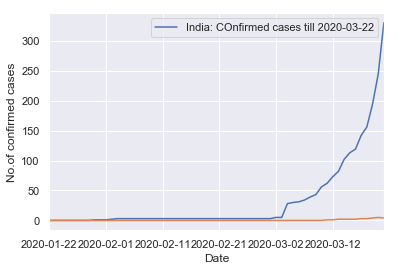

In [0]:
train_daily_report_india=train[train['Country/Region']=='India']
train_daily_report_india_sort=train_daily_report_india.groupby('Date')['ConfirmedCases','Fatalities'].sum()
plt.figure(figsize=(12,6))
train_daily_report_india_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend(['India: COnfirmed cases till 2020-03-22'])

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 864x432 with 0 Axes>

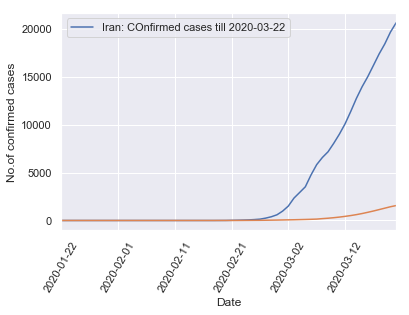

In [0]:
train_daily_report_iran=train[train['Country/Region']=='Iran']
train_daily_report_iran_sort=train_daily_report_iran.groupby('Date')['ConfirmedCases','Fatalities'].sum()
plt.figure(figsize=(12,6))
train_daily_report_iran_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend(['Iran: COnfirmed cases till 2020-03-22'])
plt.xticks(rotation=60)

In [0]:
train.head()

,Id,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [0]:
train_country_wise=train.groupby(['Date','Country/Region','Lat','Long'])['ConfirmedCases','Fatalities'].sum().reset_index()

In [0]:
print(train_country_wise.head(10))
print(train_country_wise.shape)
print(train_country_wise.info())

         Date       Country/Region      Lat      Long  ConfirmedCases  \
0  2020-01-22          Afghanistan  33.0000   65.0000             0.0   
1  2020-01-22              Albania  41.1533   20.1683             0.0   
2  2020-01-22              Algeria  28.0339    1.6596             0.0   
3  2020-01-22              Andorra  42.5063    1.5218             0.0   
4  2020-01-22  Antigua and Barbuda  17.0608  -61.7964             0.0   
5  2020-01-22            Argentina -38.4161  -63.6167             0.0   
6  2020-01-22              Armenia  40.0691   45.0382             0.0   
7  2020-01-22                Aruba  12.5211  -69.9683             0.0   
8  2020-01-22            Australia -41.4545  145.9707             0.0   
9  2020-01-22            Australia -37.8136  144.9631             0.0   

   Fatalities  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0  
(17040, 6)
<class 'p

In [0]:
train_country_wise.Date=pd.to_datetime(train_country_wise['Date'])

In [0]:
train_country_wise.head()

,Date,Country/Region,Lat,Long,ConfirmedCases,Fatalities
0,2020-01-22,Afghanistan,33.0000,65.0000,0.0,0.0
1,2020-01-22,Albania,41.1533,20.1683,0.0,0.0
2,2020-01-22,Algeria,28.0339,1.6596,0.0,0.0
3,2020-01-22,Andorra,42.5063,1.5218,0.0,0.0
4,2020-01-22,Antigua and Barbuda,17.0608,-61.7964,0.0,0.0


In [0]:
train_country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Data columns (total 6 columns):
Date              17040 non-null datetime64[ns]
Country/Region    17040 non-null object
Lat               17040 non-null float64
Long              17040 non-null float64
ConfirmedCases    17040 non-null float64
Fatalities        17040 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 798.8+ KB


In [0]:
train['Fataility ratio']=train['Fatalities']/train['ConfirmedCases']

In [0]:
train.tail(120)

,Id,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,Fataility ratio
16920,26227,Vietnam,16.0000,108.0000,2020-01-22,0.0,0.0,NaN
16921,26228,Vietnam,16.0000,108.0000,2020-01-23,2.0,0.0,0.0
16922,26229,Vietnam,16.0000,108.0000,2020-01-24,2.0,0.0,0.0
16923,26230,Vietnam,16.0000,108.0000,2020-01-25,2.0,0.0,0.0
16924,26231,Vietnam,16.0000,108.0000,2020-01-26,2.0,0.0,0.0
16925,26232,Vietnam,16.0000,108.0000,2020-01-27,2.0,0.0,0.0
16926,26233,Vietnam,16.0000,108.0000,2020-01-28,2.0,0.0,0.0
16927,26234,Vietnam,16.0000,108.0000,2020-01-29,2.0,0.0,0.0
16928,26235,Vietnam,16.0000,108.0000,2020-01-30,2.0,0.0,0.0
16929,26236,Vietnam,16.0000,108.0000,2020-01-31,2.0,0.0,0.0
